In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
price_index = pd.read_csv('18100205.csv')
price_index.head()

,REF_DATE,GEO,DGUID,New housing price indexes,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1981-01,Canada,2016A000011124,Total (house and land),"Index, 201612=100",347,units,0,v111955442,1.1,38.2,NaN,NaN,NaN,1
1,1981-01,Canada,2016A000011124,House only,"Index, 201612=100",347,units,0,v111955443,1.2,36.1,NaN,NaN,NaN,1
2,1981-01,Canada,2016A000011124,Land only,"Index, 201612=100",347,units,0,v111955444,1.3,40.6,E,NaN,NaN,1
3,1981-01,Atlantic Region,2016A00011,Total (house and land),"Index, 201612=100",347,units,0,v111955445,2.1,NaN,..,NaN,NaN,1
4,1981-01,Atlantic Region,2016A00011,House only,"Index, 201612=100",347,units,0,v111955446,2.2,NaN,..,NaN,NaN,1


In [12]:
price_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59040 entries, 0 to 59039
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   REF_DATE                   59040 non-null  object 
 1   GEO                        59040 non-null  object 
 2   DGUID                      57564 non-null  object 
 3   New housing price indexes  59040 non-null  object 
 4   UOM                        59040 non-null  object 
 5   UOM_ID                     59040 non-null  int64  
 6   SCALAR_FACTOR              59040 non-null  object 
 7   SCALAR_ID                  59040 non-null  int64  
 8   VECTOR                     59040 non-null  object 
 9   COORDINATE                 59040 non-null  float64
 10  VALUE                      48214 non-null  float64
 11  STATUS                     27116 non-null  object 
 12  SYMBOL                     0 non-null      float64
 13  TERMINATED                 0 non-null      flo

In [34]:
price_index['GEO'].value_counts()

Canada                                                 1476
Atlantic Region                                        1476
Kitchener-Cambridge-Waterloo, Ontario                  1476
Guelph, Ontario                                        1476
London, Ontario                                        1476
Windsor, Ontario                                       1476
Greater Sudbury, Ontario                               1476
Prairie Region                                         1476
Manitoba                                               1476
Winnipeg, Manitoba                                     1476
Saskatchewan                                           1476
Regina, Saskatchewan                                   1476
Saskatoon, Saskatchewan                                1476
Alberta                                                1476
Calgary, Alberta                                       1476
Edmonton, Alberta                                      1476
British Columbia                        

In [45]:
price_index[(price_index['GEO'].str.contains('Ontario'))]['GEO'].value_counts()

Ottawa-Gatineau, Quebec part, Ontario/Quebec     1476
Ontario                                          1476
Ottawa-Gatineau, Ontario part, Ontario/Quebec    1476
Oshawa, Ontario                                  1476
Toronto, Ontario                                 1476
Hamilton, Ontario                                1476
St. Catharines-Niagara, Ontario                  1476
Kitchener-Cambridge-Waterloo, Ontario            1476
Guelph, Ontario                                  1476
London, Ontario                                  1476
Windsor, Ontario                                 1476
Greater Sudbury, Ontario                         1476
Name: GEO, dtype: int64

In [174]:
ontario_cities = price_index[(price_index['GEO'].str.contains('Ontario'))&
            (price_index['VALUE'].notnull()) &            
            (price_index['New housing price indexes'] == 'House only')&
              (price_index['GEO']!='Ottawa-Gatineau, Quebec part, Ontario/Quebec')
                ]
ontario_cities


,REF_DATE,GEO,DGUID,New housing price indexes,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
52,1981-01,"Ottawa-Gatineau, Ontario part, Ontario/Quebec",2011S050335505,House only,"Index, 201612=100",347,units,0,v111955494,18.2,30.8,NaN,NaN,NaN,1
58,1981-01,"Toronto, Ontario",2011S0503535,House only,"Index, 201612=100",347,units,0,v111955500,20.2,22.6,NaN,NaN,NaN,1
61,1981-01,"Hamilton, Ontario",2011S0503537,House only,"Index, 201612=100",347,units,0,v111955503,21.2,24.8,NaN,NaN,NaN,1
64,1981-01,"St. Catharines-Niagara, Ontario",2011S0503539,House only,"Index, 201612=100",347,units,0,v111955506,22.2,28.3,NaN,NaN,NaN,1
67,1981-01,"Kitchener-Cambridge-Waterloo, Ontario",2011S0503541,House only,"Index, 201612=100",347,units,0,v111955509,23.2,30.4,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58987,2021-12,"Kitchener-Cambridge-Waterloo, Ontario",2011S0503541,House only,"Index, 201612=100",347,units,0,v111955509,23.2,149.2,NaN,NaN,NaN,1
58990,2021-12,"Guelph, Ontario",2011S0503550,House only,"Index, 201612=100",347,units,0,v111955512,24.2,134.1,NaN,NaN,NaN,1
58993,2021-12,"London, Ontario",2011S0503555,House only,"Index, 201612=100",347,units,0,v111955515,25.2,151.2,NaN,NaN,NaN,1
58996,2021-12,"Windsor, Ontario",2011S0503559,House only,"Index, 201612=100",347,units,0,v111955518,26.2,139.0,NaN,NaN,NaN,1


In [175]:
ontario_cities['GEO'].value_counts()

Ottawa-Gatineau, Ontario part, Ontario/Quebec    492
Toronto, Ontario                                 492
Hamilton, Ontario                                492
St. Catharines-Niagara, Ontario                  492
Kitchener-Cambridge-Waterloo, Ontario            492
London, Ontario                                  492
Windsor, Ontario                                 492
Greater Sudbury, Ontario                         492
Ontario                                          432
Oshawa, Ontario                                   61
Guelph, Ontario                                   61
Name: GEO, dtype: int64

In [177]:
ontario_cities['REF_DATE']

52       1981-01
58       1981-01
61       1981-01
64       1981-01
67       1981-01
          ...   
58987    2021-12
58990    2021-12
58993    2021-12
58996    2021-12
58999    2021-12
Name: REF_DATE, Length: 4490, dtype: object

In [178]:
ontario_cities['REF_DATE'] = pd.to_datetime(ontario_cities['REF_DATE'],format="%Y-%m")

/var/folders/h8/ptwstrf13vlf10mtjx1mdtw80000gn/T/ipykernel_3212/3332281473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ontario_cities['REF_DATE'] = pd.to_datetime(ontario_cities['REF_DATE'],format="%Y-%m")


In [179]:
ontario_cities['REF_DATE']

52      1981-01-01
58      1981-01-01
61      1981-01-01
64      1981-01-01
67      1981-01-01
           ...    
58987   2021-12-01
58990   2021-12-01
58993   2021-12-01
58996   2021-12-01
58999   2021-12-01
Name: REF_DATE, Length: 4490, dtype: datetime64[ns]

In [190]:
ontario_lands = price_index[(price_index['GEO'].str.contains('Ontario'))&
            (price_index['VALUE'].notnull()) &            
            (price_index['New housing price indexes'] == 'Land only')&
              (price_index['GEO']!='Ottawa-Gatineau, Quebec part, Ontario/Quebec')
                ]
ontario_lands

,REF_DATE,GEO,DGUID,New housing price indexes,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
53,1981-01,"Ottawa-Gatineau, Ontario part, Ontario/Quebec",2011S050335505,Land only,"Index, 201612=100",347,units,0,v111955495,18.3,39.9,E,NaN,NaN,1
59,1981-01,"Toronto, Ontario",2011S0503535,Land only,"Index, 201612=100",347,units,0,v111955501,20.3,39.1,E,NaN,NaN,1
62,1981-01,"Hamilton, Ontario",2011S0503537,Land only,"Index, 201612=100",347,units,0,v111955504,21.3,46.0,E,NaN,NaN,1
65,1981-01,"St. Catharines-Niagara, Ontario",2011S0503539,Land only,"Index, 201612=100",347,units,0,v111955507,22.3,35.6,E,NaN,NaN,1
68,1981-01,"Kitchener-Cambridge-Waterloo, Ontario",2011S0503541,Land only,"Index, 201612=100",347,units,0,v111955510,23.3,43.4,E,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58988,2021-12,"Kitchener-Cambridge-Waterloo, Ontario",2011S0503541,Land only,"Index, 201612=100",347,units,0,v111955510,23.3,158.8,E,NaN,NaN,1
58991,2021-12,"Guelph, Ontario",2011S0503550,Land only,"Index, 201612=100",347,units,0,v111955513,24.3,108.1,E,NaN,NaN,1
58994,2021-12,"London, Ontario",2011S0503555,Land only,"Index, 201612=100",347,units,0,v111955516,25.3,116.8,E,NaN,NaN,1
58997,2021-12,"Windsor, Ontario",2011S0503559,Land only,"Index, 201612=100",347,units,0,v111955519,26.3,133.1,E,NaN,NaN,1


In [191]:
ontario_lands['REF_DATE'] = pd.to_datetime(ontario_lands['REF_DATE'],format="%Y-%m")

/var/folders/h8/ptwstrf13vlf10mtjx1mdtw80000gn/T/ipykernel_3212/3556629304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ontario_lands['REF_DATE'] = pd.to_datetime(ontario_lands['REF_DATE'],format="%Y-%m")


In [192]:
ontario_lands['REF_DATE']

53      1981-01-01
59      1981-01-01
62      1981-01-01
65      1981-01-01
68      1981-01-01
           ...    
58988   2021-12-01
58991   2021-12-01
58994   2021-12-01
58997   2021-12-01
59000   2021-12-01
Name: REF_DATE, Length: 4490, dtype: datetime64[ns]

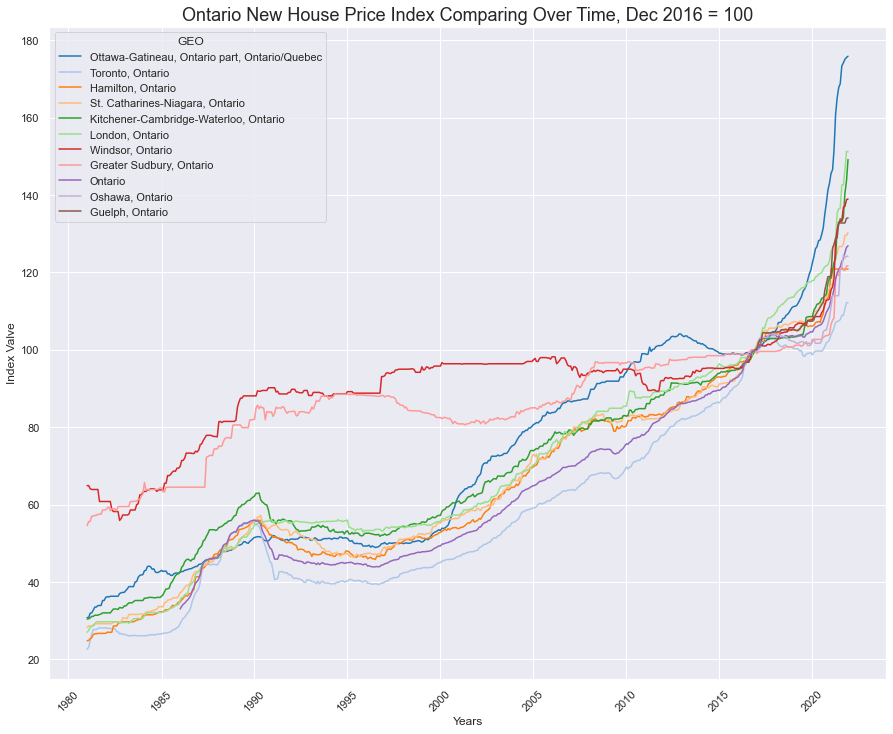

In [188]:
plt.figure(figsize=(15,12))
sns.set_theme(style="darkgrid")

ax = sns.lineplot(x="REF_DATE", y="VALUE",hue="GEO",
             data=ontario_cities,palette="tab20")
ax.set_title('Ontario New House Price Index Comparing Over Time, Dec 2016 = 100',size=18)
ax.set_xlabel('Years')
ax.set_ylabel('Index Valve')
plt.xticks(rotation=45)
plt.show()

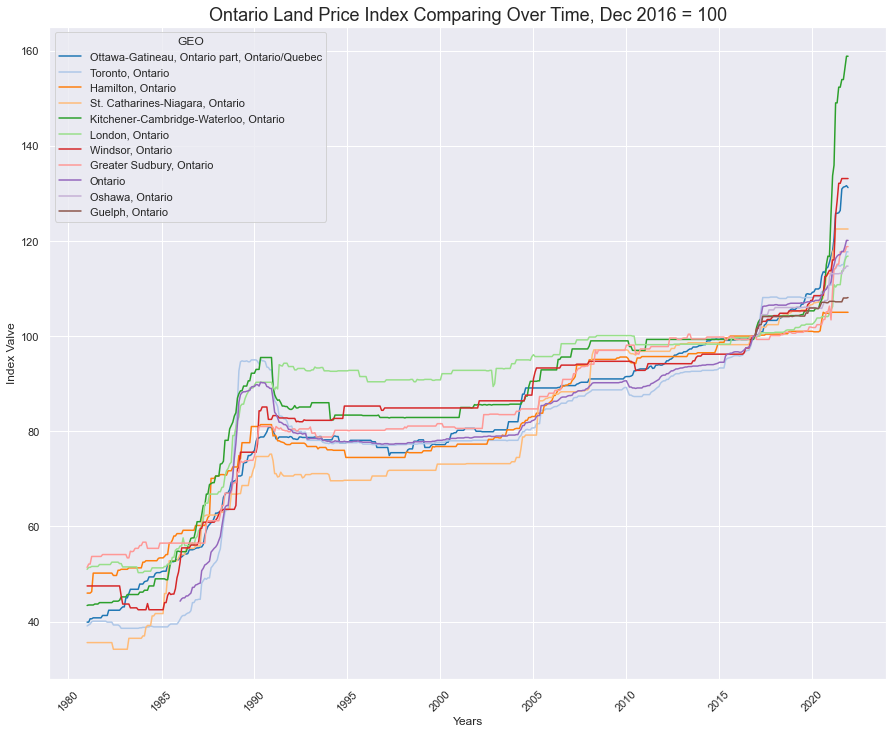

In [193]:
plt.figure(figsize=(15,12))
sns.set_theme(style="darkgrid")

ax = sns.lineplot(x="REF_DATE", y="VALUE",hue="GEO",
             data=ontario_lands,palette="tab20")
ax.set_title('Ontario Land Price Index Comparing Over Time, Dec 2016 = 100',size=18)
ax.set_xlabel('Years')
ax.set_ylabel('Index Valve')
plt.xticks(rotation=45)
plt.show()